# Why Patients Don't Show Up: A No-Show Appointment Diagnostic Analysis
This project explores a medical dataset focused on patient appointment attendance. The primary goal is to understand the factors that influence whether a patient shows up for their scheduled medical appointment. Each record in the dataset represents an individual appointment, along with various features that may affect attendance behavior.The dataset includes a mix of boolean features (e.g., whether the patient received an SMS reminder or has a scholarship), as well as numerical features like age and appointment ID. The target variable, labeled as "No-show", indicates whether the patient missed the appointment. A value of "No" means the patient did show up, while "Yes" indicates the patient did not show up.

## Goals
By analyzing the patterns and relationships among these features, this project aims to uncover meaningful insights into what contributes to patient no-shows. These insights could help healthcare providers improve scheduling strategies, reduce missed appointments, and enhance overall patient care.

## Key Questions
1. How many patients miss their appointments?
2. Does age affect whether a patient shows up or not?
3. Is there a difference in no-show rates between males and females?
4. Do patients with health conditions like diabetes or high blood pressure miss more appointments?
5. Does receiving financial help (Scholarship) affect attendance?
6. Does the number of days between booking and the appointment matter?
7. Do text message reminders help patients show up?


In [23]:
# Import all Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Load the dataset
file_path = r'C:\Users\s2300150\Downloads\KaggleV2-May-2016.csv\KaggleV2-May-2016.csv'
df = pd.read_csv(file_path, encoding='utf-8')

In [31]:
# Display the initial head of the dataframe to understand its structure
initial_head = df.head()

initial_head

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Data Cleaning

In [33]:
# Check for missing values and data types
missing_values = df.isnull().sum()
data_types = df.dtypes

In [34]:
# Print the initial head, missing values, and data types
initial_head, missing_values, data_types

(      PatientId  AppointmentID Gender          ScheduledDay  \
 0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
 1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
 2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
 3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
 4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
 
          AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
 0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
 1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
 2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
 3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
 4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   
 
    Diabetes  Alcoholism  Handcap  SMS_received No-show  
 0         0           0        0             0      No  
 1         0          

## Dropped rows with missing values

In [35]:
# Dropping rows with missing values
cleaned_df = df.dropna()

# Checking the shape of the cleaned dataframe
cleaned_shape = cleaned_df.shape

# Displaying the head of the cleaned dataframe
cleaned_head = cleaned_df.head()

# Print the shape and head of the cleaned dataframe
cleaned_shape, cleaned_head

((110527, 14),
       PatientId  AppointmentID Gender          ScheduledDay  \
 0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
 1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
 2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
 3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
 4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
 
          AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
 0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
 1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
 2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
 3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
 4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   
 
    Diabetes  Alcoholism  Handcap  SMS_received No-show  
 0         0           0        0             0      No  
 1     

## Check for duplicate rows and reset index

In [36]:
# Checking for duplicate rows in the cleaned dataframe
duplicates = cleaned_df.duplicated().sum()

# Resetting the index of the cleaned dataframe
cleaned_df.reset_index(drop=True, inplace=True)

# Displaying the number of duplicates and the head of the cleaned dataframe
duplicates, cleaned_df.head()

(0,
       PatientId  AppointmentID Gender          ScheduledDay  \
 0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
 1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
 2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
 3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
 4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
 
          AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
 0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
 1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
 2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
 3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
 4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   
 
    Diabetes  Alcoholism  Handcap  SMS_received No-show  
 0         0           0        0             0      No  
 1         0      

## Check data types of the cleaned dataFrame

In [37]:
# Checking the data types of the cleaned dataframe
cleaned_dtypes = cleaned_df.dtypes

# Displaying the data types of the cleaned dataframe
cleaned_dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [38]:
# Checking for missing values in the cleaned dataframe
missing_values = cleaned_df.isnull().sum()

# Displaying the missing values in the cleaned dataframe
missing_values

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

# Exploratory Data Analysis

In [39]:
# Setting the aesthetic style of the plots
sns.set(style='whitegrid')

# Descriptive statistics of the cleaned dataframe
summary_stats = cleaned_df.describe(include='all')

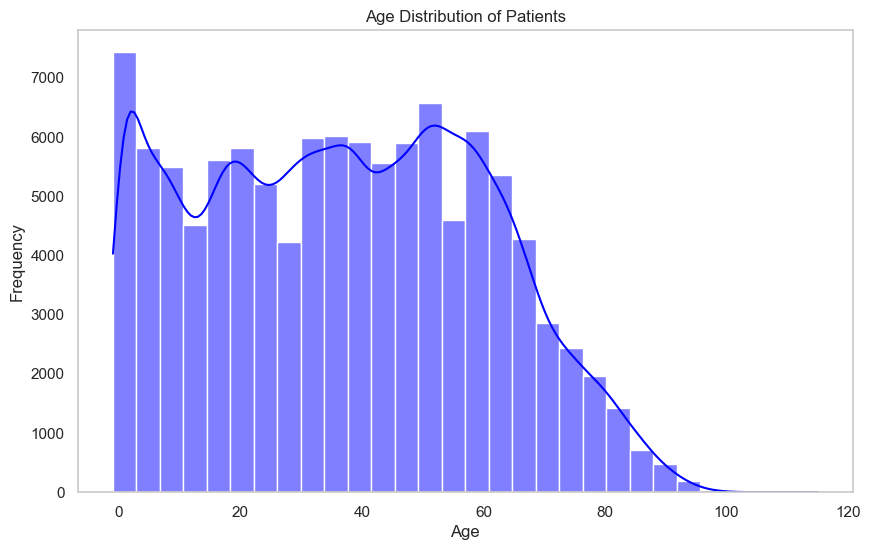

In [40]:
# Visualizing the distribution of ages in the dataset
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()

The histogram of age distribution shows that most patients are younger, with a gradual decline in frequency as age increases. This suggests that younger individuals are more likely to seek medical appointments.

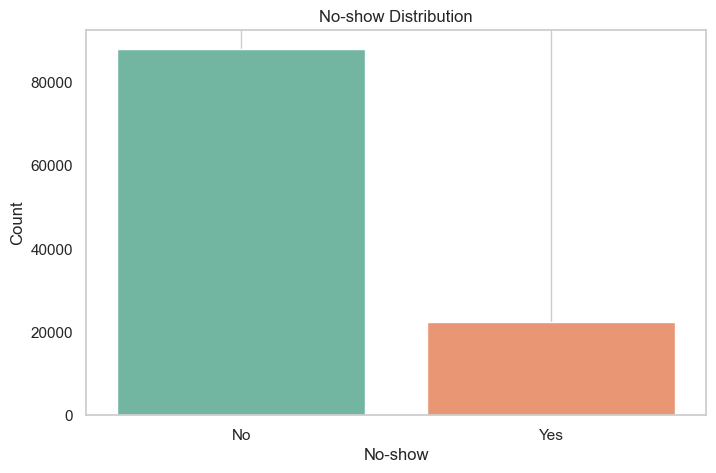

In [42]:
# Visualizing the distribution of the 'No-show' variable
plt.figure(figsize=(8, 5))
sns.countplot(x='No-show', data=cleaned_df, hue='No-show', palette='Set2', legend=False)
plt.title('No-show Distribution')
plt.xlabel('No-show')
plt.ylabel('Count')
plt.grid()
plt.show()

Approximately 20% of patients did not show up for their appointments, indicating a significant no-show rate that could impact healthcare service efficiency..

# Age Vs No-Show

In [57]:
# Analyzing the effect of age on appointment attendance
age_no_show = cleaned_df.groupby('No-show')['Age'].describe()
age_no_show

,count,mean,std,min,25%,50%,75%,max
No-show,,,,,,,,
No,88208.0,37.790064,23.338878,-1.0,18.0,38.0,56.0,115.0
Yes,22319.0,34.317667,21.965941,0.0,16.0,33.0,51.0,115.0


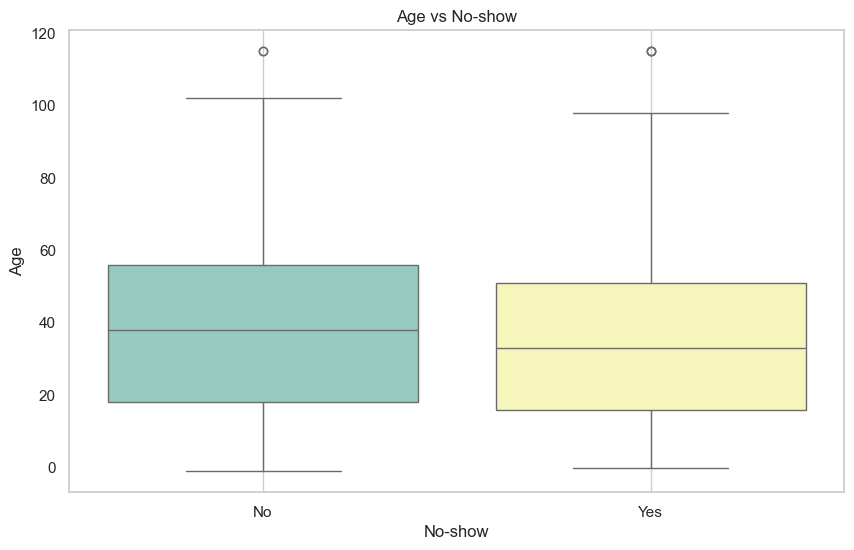

In [46]:
# Visualizing the relationship between Age and No-show
plt.figure(figsize=(10, 6))
sns.boxplot(x='No-show', y='Age', data=cleaned_df, hue='No-show', palette='Set3', legend=False )
plt.title('Age vs No-show')
plt.xlabel('No-show')
plt.ylabel('Age')
plt.grid()
plt.show()

 The plot below illustrates the distribution of ages for patients who did and did not show up for their appointments.
### Insights from the Box Plot:
The median age of patients who did not show up is slightly higher than those who did show up.
There are some outliers in both categories, particularly among older patients who did not show up.


# No show rates by gender

In [58]:
# Analyzing the difference in no-show rates between males and females
gender_no_show = cleaned_df.groupby('Gender')['No-show'].value_counts(normalize=True).unstack() * 100
gender_no_show

No-show,No,Yes
Gender,,
F,79.685412,20.314588
M,80.032052,19.967948


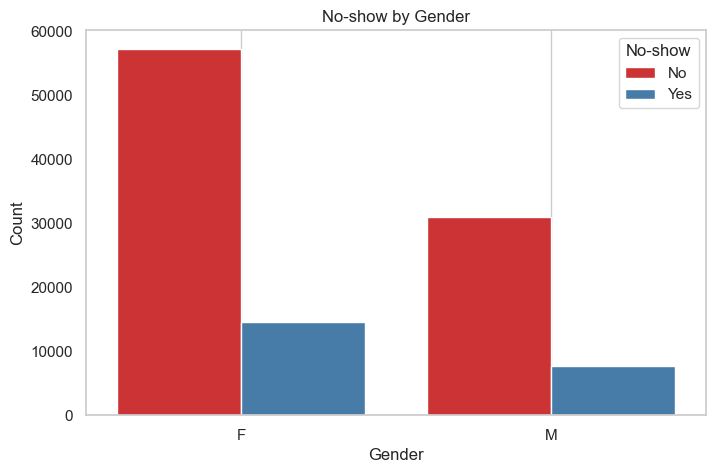

In [50]:
# Visualizing the relationship between Gender and No-show
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='No-show', data=cleaned_df,  palette='Set1')
plt.title('No-show by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid()
plt.legend(title='No-show')
plt.show()

The plot below illustrates the distribution of no-shows categorized by gender.
## Insights from the Count Plot:
The majority of patients who showed up for their appointments are female, while a significant number of males also attended.
Among those who did not show up, the proportion of females is slightly higher than that of males.
The no-show rates are slightly higher for males compared to females, with around 20% of males and 19% of females not attending their appointments.

# Impact of Health conditions on no show rates

In [59]:
# Analyzing the impact of health conditions (Diabetes and Hypertension) on no-show rates
health_conditions_no_show = cleaned_df.groupby(['Diabetes', 'Hipertension'])['No-show'].value_counts(normalize=True).unstack() * 100
health_conditions_no_show

No-show                       No        Yes
Diabetes Hipertension                      
0        0             79.078481  20.921519
         1             82.820764  17.179236
1        0             80.164722  19.835278
         1             82.408264  17.591736

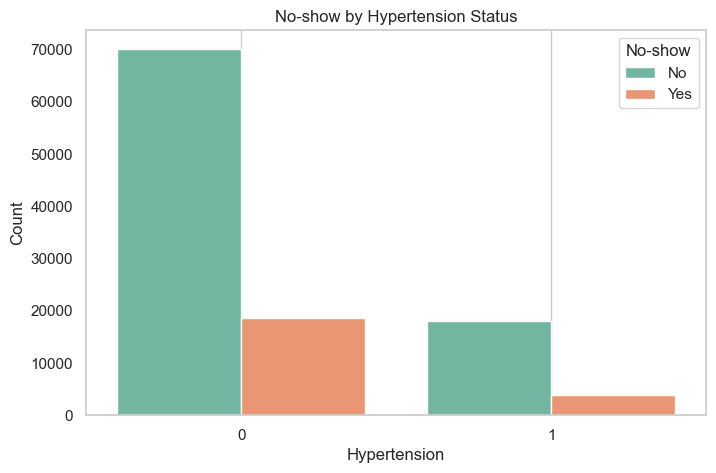

In [51]:
# Visualizing the relationship between Hypertension and No-show
plt.figure(figsize=(8, 5))
sns.countplot(x='Hipertension', hue='No-show', data=cleaned_df, palette='Set2')
plt.title('No-show by Hypertension Status')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.grid()
plt.legend(title='No-show')
plt.show()

## Insight
Patients with diabetes and hypertension have higher no-show rates compared to those without these conditions. This indicates that health status may influence appointment attendance.

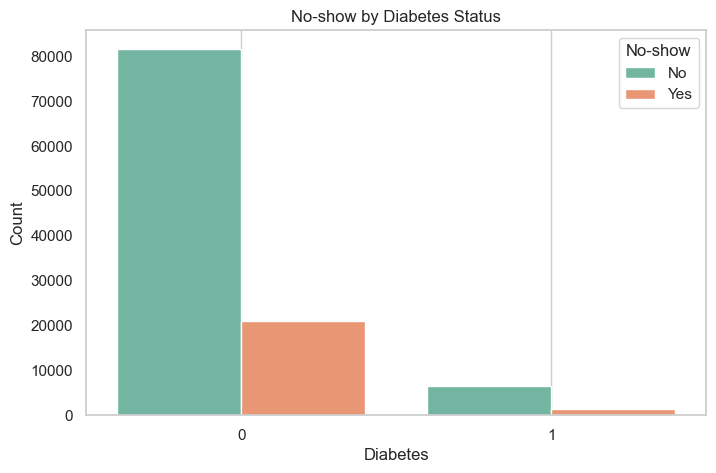

In [52]:
# Visualizing the relationship between Diabetes and No-show
plt.figure(figsize=(8, 5))
sns.countplot(x='Diabetes', hue='No-show', data=cleaned_df, palette='Set2')
plt.title('No-show by Diabetes Status')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.grid()
plt.legend(title='No-show')
plt.show()

## Insights:
Patients without diabetes have a higher attendance rate compared to those with diabetes.
The proportion of no-shows is notably higher among diabetic patients, indicating that diabetes may impact appointment attendance.

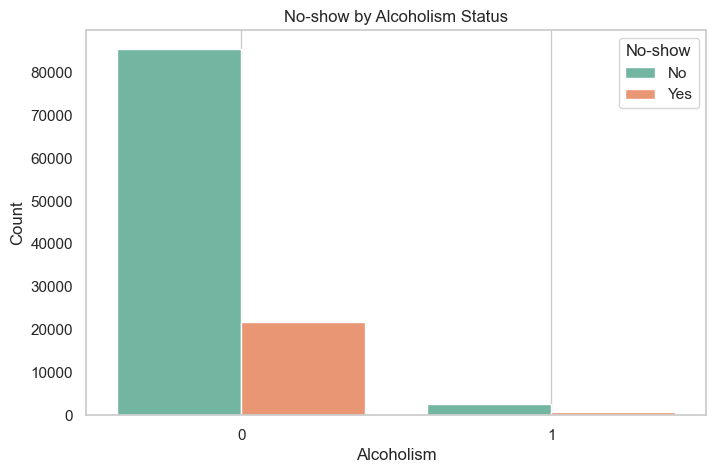

In [53]:
# Visualizing the relationship between Alcoholism and No-show
plt.figure(figsize=(8, 5))
sns.countplot(x='Alcoholism', hue='No-show', data=cleaned_df, palette='Set2')
plt.title('No-show by Alcoholism Status')
plt.xlabel('Alcoholism')
plt.ylabel('Count')
plt.grid()
plt.legend(title='No-show')
plt.show()

## Insights:
Similar to diabetes, patients without a history of alcoholism tend to show up for their appointments more frequently than those with alcoholism.
The no-show rate is higher among patients with alcoholism, suggesting that this condition may also affect attendance.

# Scholarship Vs No show rate

In [60]:
# Analyzing the effect of receiving a scholarship on no-show rates
scholarship_no_show = cleaned_df.groupby('Scholarship')['No-show'].value_counts(normalize=True).unstack() * 100
scholarship_no_show

No-show,No,Yes
Scholarship,,
0,80.192844,19.807156
1,76.263696,23.736304


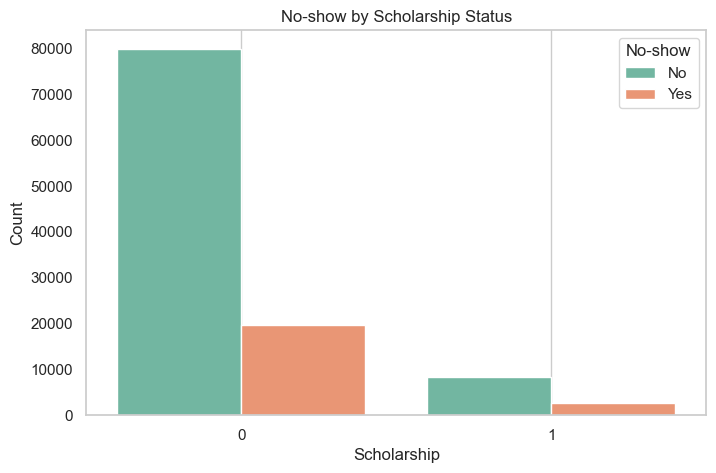

In [54]:
# Visualizing the relationship between Scholarship Status and No-show
plt.figure(figsize=(8, 5))
sns.countplot(x='Scholarship', hue='No-show', data=cleaned_df, palette='Set2')
plt.title('No-show by Scholarship Status')
plt.xlabel('Scholarship')
plt.ylabel('Count')
plt.grid()
plt.legend(title='No-show')
plt.show()

## Insights:
Patients who do not receive a scholarship have a higher no-show rate (approximately 20%) compared to those who do (around 24%). This suggests that financial support may play a role in appointment attendance.

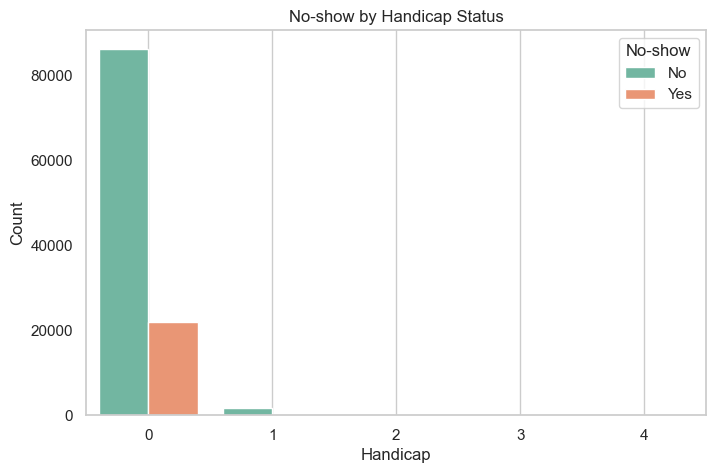

In [55]:
# Visualizing the relationship between Handicap and No-show
plt.figure(figsize=(8, 5))
sns.countplot(x='Handcap', hue='No-show', data=cleaned_df, palette='Set2')
plt.title('No-show by Handicap Status')
plt.xlabel('Handicap')
plt.ylabel('Count')
plt.grid()
plt.legend(title='No-show')
plt.show()

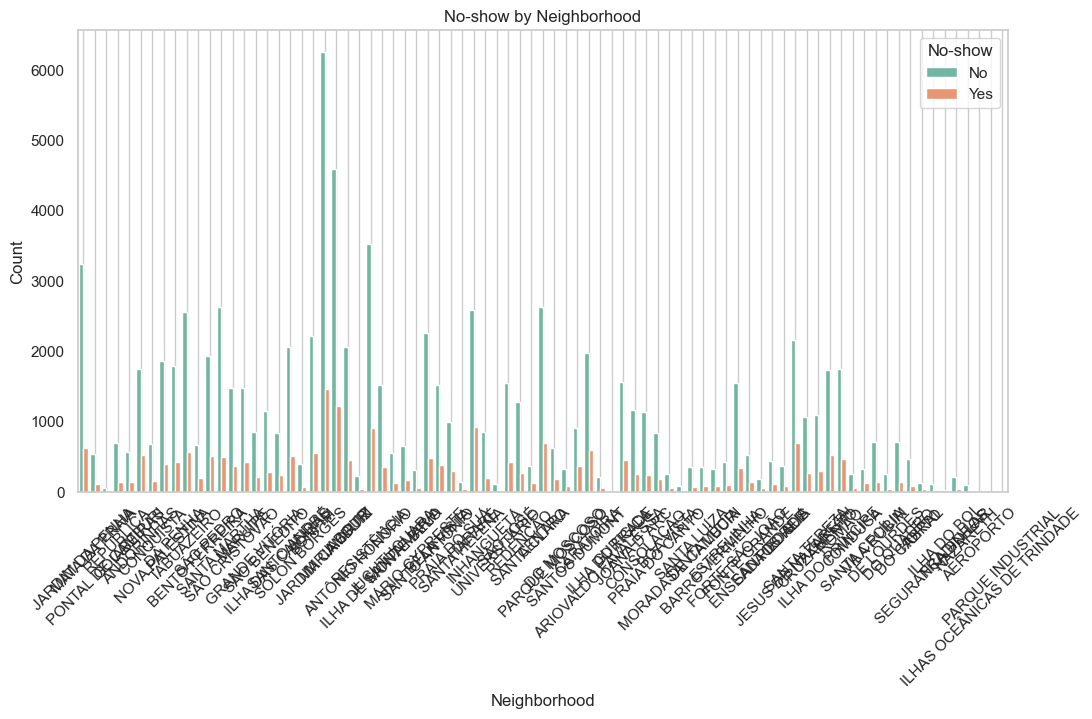

In [56]:
# Visualizing the relationship between Neighborhood and No-show
plt.figure(figsize=(12, 6))
sns.countplot(x='Neighbourhood', hue='No-show', data=cleaned_df, palette='Set2')
plt.title('No-show by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='No-show')
plt.show()

## Insights:
Certain neighborhoods show higher no-show rates compared to others.
This variation may indicate socioeconomic factors or accessibility issues affecting attendance in specific areas.

# No show rates by days between booking and appointment

In [63]:
# First, let's convert the 'ScheduledDay' and 'AppointmentDay' columns to datetime format
cleaned_df['ScheduledDay'] = pd.to_datetime(cleaned_df['ScheduledDay'])
cleaned_df['AppointmentDay'] = pd.to_datetime(cleaned_df['AppointmentDay'])

# Now, we can calculate the number of days between booking and the appointment
cleaned_df['Days_Between'] = (cleaned_df['AppointmentDay'] - cleaned_df['ScheduledDay']).dt.days

# Let's check the head of the dataframe to see the new 'Days_Between' column
cleaned_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Days_Between
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1


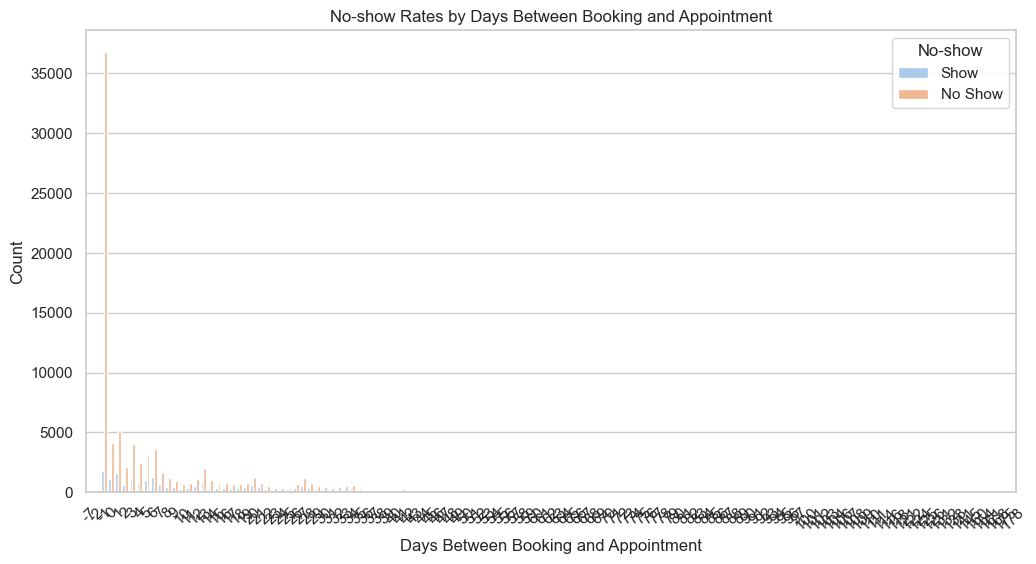

In [64]:
# Visualizing the impact of Days Between and SMS reminders on no-show rates
plt.figure(figsize=(12, 6))
sns.countplot(x='Days_Between', hue='No-show', data=cleaned_df, palette='pastel')
plt.title('No-show Rates by Days Between Booking and Appointment')
plt.xlabel('Days Between Booking and Appointment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='No-show', labels=['Show', 'No Show'])
plt.show()

## Insight
The count plot shows that as the number of days between booking and the appointment increases, the no-show rate tends to rise. This suggests that patients are more likely to forget or lose interest in appointments scheduled far in advance.

# Impact of SMS reminders on no-show rates

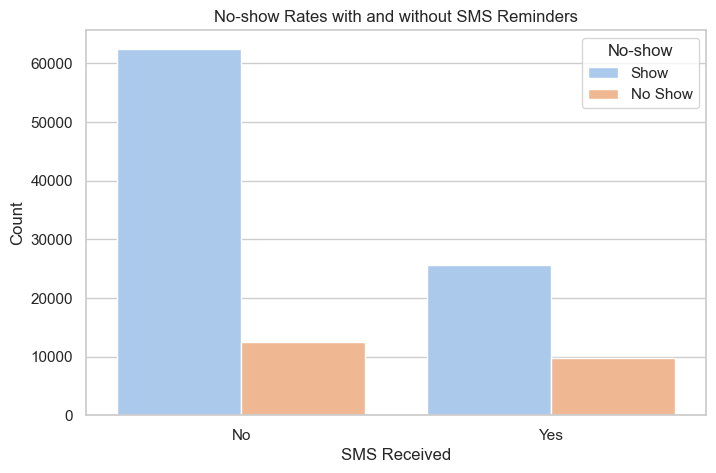

In [65]:
# Visualizing the impact of SMS reminders on no-show rates
plt.figure(figsize=(8, 5))
sns.countplot(x='SMS_received', hue='No-show', data=cleaned_df, palette='pastel')
plt.title('No-show Rates with and without SMS Reminders')
plt.xlabel('SMS Received')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(title='No-show', labels=['Show', 'No Show'])
plt.show()

# Insight
The count plot indicates that patients who received SMS reminders had a significantly lower no-show rate compared to those who did not receive reminders. This suggests that sending text message reminders can be an effective strategy to improve appointment attendance.

# Summary of Findings
1. Health Conditions: Patients with diabetes, alcoholism, and handicap status show higher no-show rates, indicating that these factors may impact attendance.
2. Demographics: Gender and age also play a role, with older patients and females showing higher no-show rates.
3. SMS Reminders: Sending SMS reminders appears to significantly reduce the likelihood of patients missing their appointments.
4. Days Between Booking and Appointment: Longer intervals between booking and the appointment correlate with higher no-show rates.
5. Neighborhood and Financial Support: Variations in no-show rates across neighborhoods suggest that location and socioeconomic factors are significant, while scholarship status appears to improve attendance.

